In [10]:
# Em uma célula do Jupyter Notebook:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# Configurações de plotagem (opcional, para melhor visualização)
plt.style.use('seaborn-v0_8-darkgrid') # Usando um estilo do seaborn
plt.rcParams['figure.figsize'] = (15, 7) # Tamanho padrão das figuras

# --- Carregar Dados Processados ---
# Ajuste o ticker conforme necessário
ticker_symbol = 'PETR4'
processed_file_path = f"../data/processed/processed_stock_data_{ticker_symbol}.csv"

In [20]:
# Verificar se o arquivo existe
if not os.path.exists(processed_file_path):
    print(f"Arquivo não encontrado: {processed_file_path}")
    print("Certifique-se de que executou o script de pré-processamento primeiro.")
else:
    df = pd.read_csv(processed_file_path, index_col='Date', parse_dates=True)
    print(f"Dados carregados para {ticker_symbol}:")
    display(df.head()) # 'display()' é preferível a 'print()' para DataFrames no Jupyter

Dados carregados para PETR4:


,Open,High,Low,Close,Volume,Daily_Return,SMA_20,SMA_50
Date,,,,,,,,
2020-01-02,11.708283,11.781196,11.631532,11.781196,37774500,NaN,NaN,NaN
2020-01-03,11.850272,11.988423,11.685259,11.685259,71595600,-0.008143,NaN,NaN
2020-01-06,11.677583,11.873296,11.493382,11.823408,81844000,0.011823,NaN,NaN
2020-01-07,11.827246,11.850271,11.692933,11.777359,32822000,-0.003895,NaN,NaN
2020-01-08,11.777358,11.808058,11.604669,11.704445,48215600,-0.006191,NaN,NaN


# Visualizações

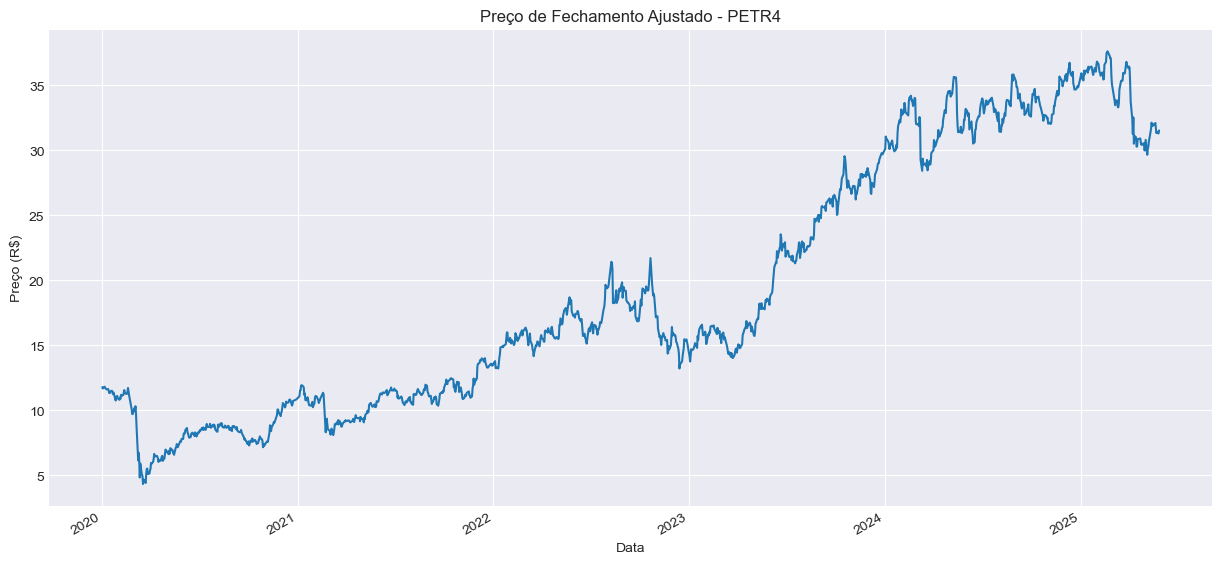

In [13]:
# 1. Preço de Fechamento Ajustado ('Adj Close')
plt.figure()
df['Close'].plot(title=f'Preço de Fechamento Ajustado - {ticker_symbol}')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')
plt.show()

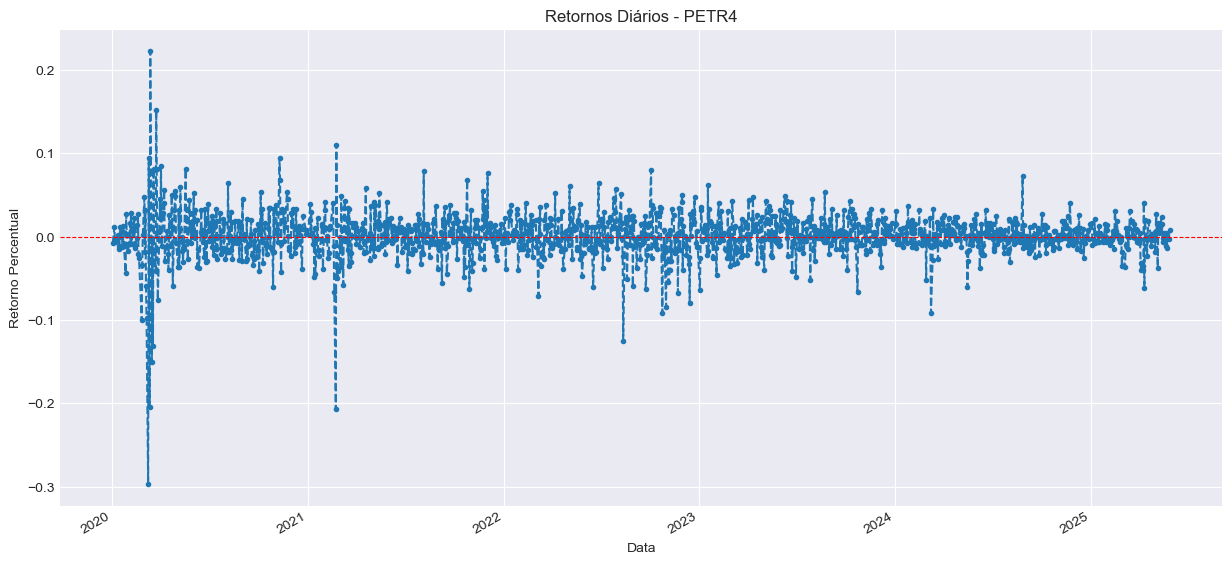

In [14]:
# 2. Retornos Diários ('Daily_Return')
plt.figure()
df['Daily_Return'].plot(title=f'Retornos Diários - {ticker_symbol}', linestyle='--', marker='o', markersize=3)
plt.ylabel('Retorno Percentual')
plt.xlabel('Data')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Linha em zero para referência
plt.show()

c:\Users\faano\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


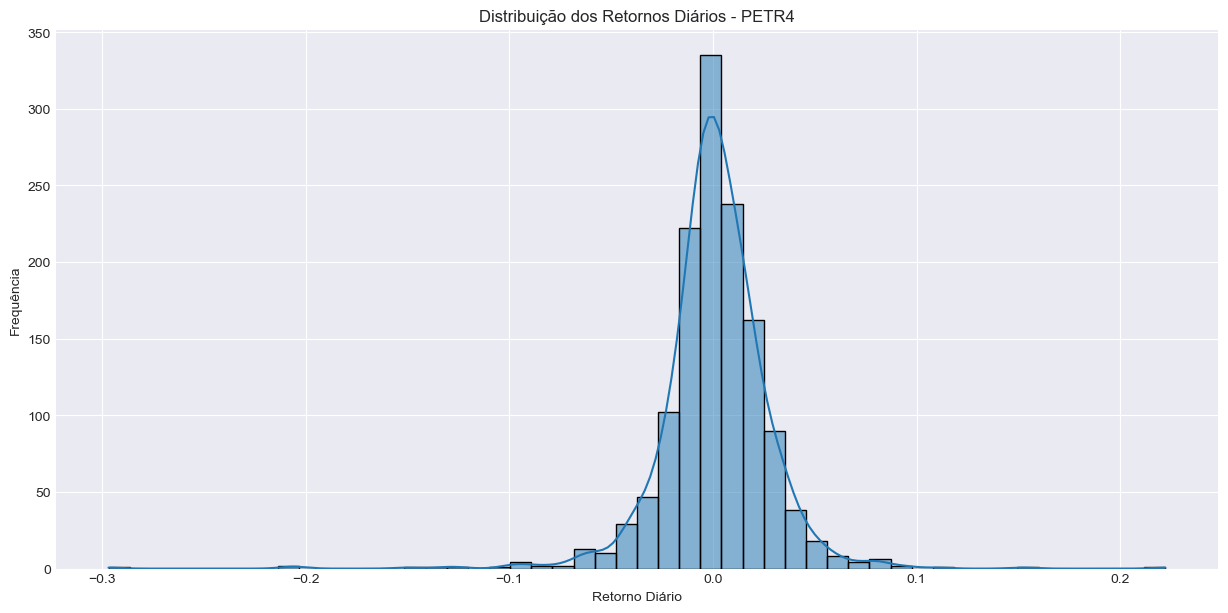

In [15]:
# 3. Histograma dos Retornos Diários
plt.figure()
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True) # dropna() para remover o primeiro NaN
plt.title(f'Distribuição dos Retornos Diários - {ticker_symbol}')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

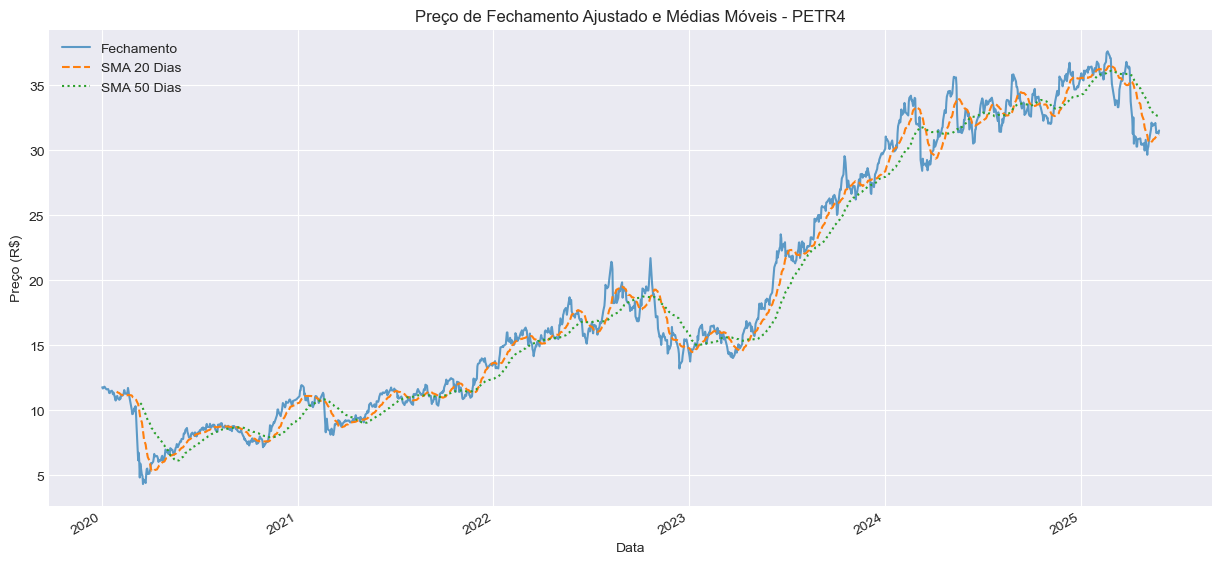

In [18]:
# 4. Preço de Fechamento Ajustado com Médias Móveis
plt.figure()
df['Close'].plot(label='Fechamento', alpha=0.7)
if 'SMA_20' in df.columns:
    df['SMA_20'].plot(label='SMA 20 Dias', linestyle='--')
if 'SMA_50' in df.columns:
    df['SMA_50'].plot(label='SMA 50 Dias', linestyle=':')
plt.title(f'Preço de Fechamento Ajustado e Médias Móveis - {ticker_symbol}')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')
plt.legend()
plt.show()